# Section 9: Partial Derivative Calculus

## 79. Partial Derivatives

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import math # for constant pi

In [59]:
def f(x, y):
    return x**2 - y**2

#### Plot z with respect to x

In [60]:
xs = np.linspace(-3, 3, 1000)

In [61]:
# Just look at the graph when y = 0, z values with respect to x
zs_wrt_x = f(xs,0)

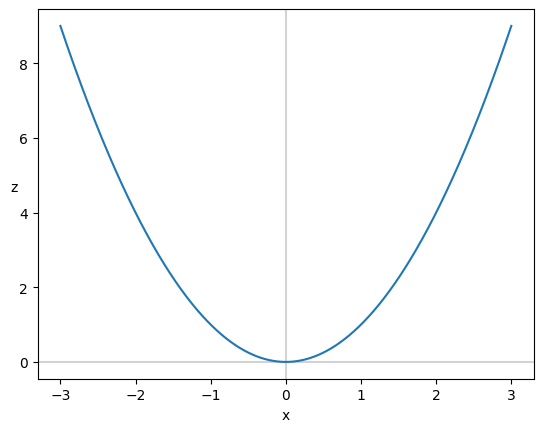

In [62]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('x')
plt.ylabel('z', rotation=0)
ax.plot(xs,zs_wrt_x)

To determine the slope of $z$ w.r.t. $x$ at a given point along the curve, we can use the partial derivative from the slides: $$ \frac{\partial z}{\partial x} = 2x$$

In [63]:
def delz_delx(x, y): # y isn't relevant for *this* partial derivative; it often would be
    return 2*x

In [64]:
x_samples = [-2, -1, 0, 1, 2]

In [65]:
colors = ['red', 'orange', 'green', 'blue', 'purple']

In [66]:
def point_and_tangent_wrt_x(xs, x, y, f, fprime, col):
    z = f(x,y) # z = f(x,y)
    tangent_m = fprime(x,y) # Slope is partial derivative of f(x,y) w.r.t x
    tangent_b = z -  tangent_m * x # z=mx + b => b = z-mx
    tangent_line = tangent_m * xs + tangent_b
    plt.scatter(x,z,c=col,zorder=3)
    plt.plot(xs, tangent_line, c=col, linestyle='dashed',
             linewidth=0.7, zorder=3)


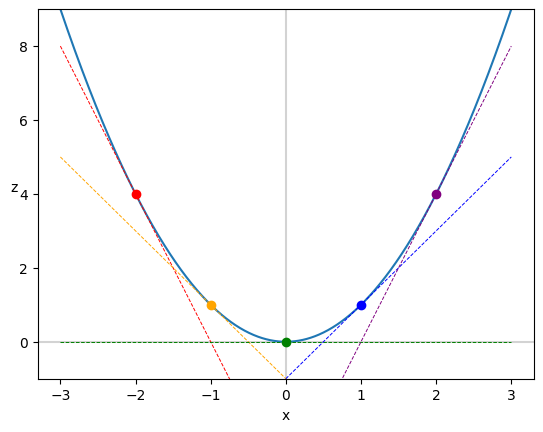

In [67]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, x in enumerate(x_samples):
    point_and_tangent_wrt_x(xs, x, 0, f, delz_delx, colors[i])

plt.ylim(-1, 9)
plt.xlabel('x')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_x)

#### Plot z with respect to y

In [68]:
ys = np.linspace(-3, 3, 1000)

In [69]:
zs_wrt_y = f(0, ys)

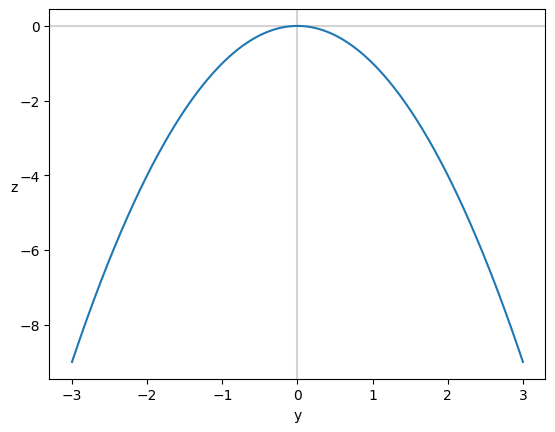

In [70]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [71]:
zs_wrt_y = f(2, ys)

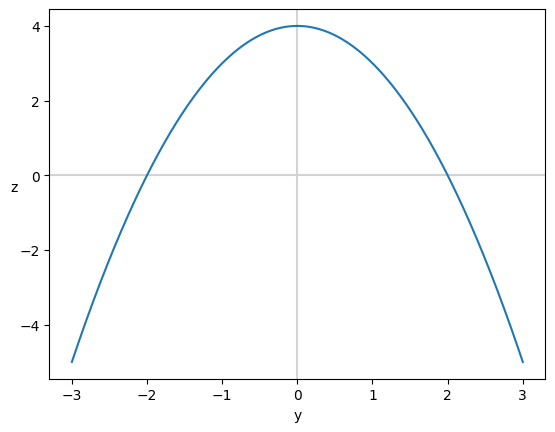

In [72]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(ys, zs_wrt_y)

In [73]:
def delz_dely(my_x, my_y):
    return -2*my_y

In [74]:
y_samples = [-2, -1, 0, 1, 2]

In [75]:
def point_and_tangent_wrt_y(my_ys, my_x, my_y, my_f, fprime, col): # changed my_xs to my_ys

    my_z = my_f(my_x, my_y) 
    plt.scatter(my_y, my_z, c=col, zorder=3) # changed my_x to my_y
    
    tangent_m = fprime(my_x, my_y) 
    tangent_b = my_z - tangent_m*my_y # changed my_x to my_y
    tangent_line = tangent_m*my_ys + tangent_b # changed my_xs to my_ys
    
    plt.plot(my_ys, tangent_line, c=col, 
             linestyle='dashed', linewidth=0.7, zorder=3) # changed my_xs to my_ys

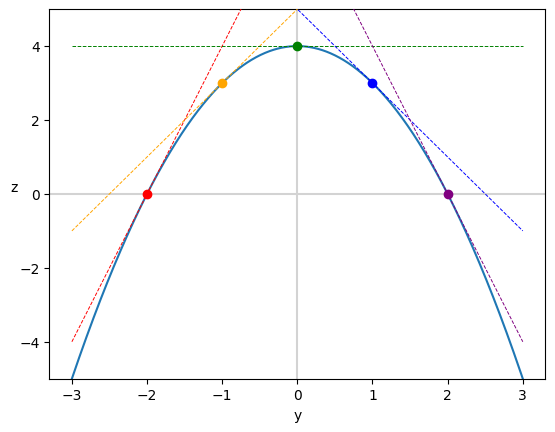

In [76]:
fig, ax = plt.subplots()
plt.axvline(x=0, color='lightgray')
plt.axhline(y=0, color='lightgray')

for i, y in enumerate(y_samples):
    point_and_tangent_wrt_y(ys, 2, y, f, delz_dely, colors[i])

plt.ylim(-5, 5)
plt.xlabel('y')
plt.ylabel('z', rotation=0)
_ = ax.plot(xs, zs_wrt_y)

**Exercises**: Use pencil and paper to determine: 

* The value of $z$,
* The slope of $z$ with respect to $x$, 
* And the slope of $z$ with respect to $y$

...at the points where: 

1. $x = 3, y = 0$
2. $x = 2, y = 3$
3. $x = -2, y = -3$

My solutions
$z=x^2 - y^2$

1. $x = 3, y = 0$
- $ z = 3^2 - 0^2 = 9$
- $ \frac{\partial z}{\partial x} = 2x = 2. 3 = 6 $
- $ \frac{\partial z}{\partial y} = -2y = -2 . 0 = 0 $


## 82. Advanced Partial Derivatives

The volume of a cylinder is described by $v = \pi r^2 l$ where: 

* $r$ is the radius of the cylinder
* $l$ is its length

In [77]:
def cylinder_vol(r, l):
    return math.pi * (r ** 2) * l

In [78]:
r = torch.tensor(3.0, requires_grad=True)
l = torch.tensor(5.0, requires_grad=True)

In [79]:
v = cylinder_vol(r,l)
v

tensor(141.3717, grad_fn=<MulBackward0>)

In [80]:
v.backward()

In [81]:
del_v_del_r = r.grad
del_v_del_l = l.grad
print(del_v_del_r)
print(del_v_del_l)

tensor(94.2478)
tensor(28.2743)


This means that with r = 3, a change in l by one unit corresponds to a change in v of 28.27 $m^3$

In [82]:
# Prove
print(del_v_del_l * 3)
print(cylinder_vol(3,3))
print(cylinder_vol(3,7) - cylinder_vol(3,6))

tensor(84.8230)
84.82300164692441
28.274333882308156


## 87, 88: The Gradient of Quadratic Cost

In [83]:
import torch

In [84]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [85]:
# The line y = mx + b
def regression(x, m, b):
    return m * x + b

In [86]:
# Initialize slope m & bias b
m = torch.tensor([0.9],requires_grad=True)
b = torch.tensor([0.1],requires_grad=True)

### Single point regression gradient

In [87]:
# Take a random data point for a simple demo
i = 7
x = xs[i]
y = ys[i]
print(x, y)

tensor(7.) tensor(-1.3700)


#### Step 1: Forward pass

In [88]:
# yhat of the data point x[i]
yhat = regression(x, m , b)
yhat

tensor([6.4000], grad_fn=<AddBackward0>)

#### Step 2: Calculate cost

In [89]:
# Only 1 data point
C = (yhat - y) ** 2
C

tensor([60.3729], grad_fn=<PowBackward0>)

#### Step 3: Use Autodiff to calculate gradient of C w.r.t parameters

In [90]:
C.backward()
print(m.grad)
print(b.grad)

tensor([108.7800])
tensor([15.5400])


"m.grad" or "b.grad" do not show how they work explicitly, we can use calculus to figure out

- $$ \frac{\partial C}{\partial m} = 2x(\hat{y} - y) $$
- $$ \frac{\partial C}{\partial b} = 2(\hat{y} - y) $$


In [91]:
m_grad = 2*x*(yhat.item() - y)
b_grad = 2*(yhat.item() - y)
print(m_grad)
print(b_grad)

tensor(108.7800)
tensor(15.5400)


The gradient of cost, which is symbolized $\nabla C$ (pronounced "nabla C"), is a vector of all the partial derivatives of $C$ with respect to each of the individual model parameters: 

$\nabla C = \nabla_p C = \left[ \frac{\partial{C}}{\partial{p_1}}, \frac{\partial{C}}{\partial{p_2}}, \cdots, \frac{\partial{C}}{\partial{p_n}} \right]^T $

In this case, there are only two parameters, $b$ and $m$: 

$\nabla C = \left[ \frac{\partial{C}}{\partial{b}}, \frac{\partial{C}}{\partial{m}} \right]^T $

In [92]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 15.5400],
        [108.7800]])

In [93]:
gradient.shape

torch.Size([2, 1])

## 90. The Gradient of Mean Squared Error
Gradient of Cost on a Batch of Data

In [94]:
import torch
import matplotlib.pyplot as plt

In [95]:
xs = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7.])
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

In [96]:
def regression(my_x, my_m, my_b):
    return my_m*my_x + my_b

In [97]:
m = torch.tensor([0.9]).requires_grad_()
b = torch.tensor([0.1]).requires_grad_()

**Step 1**: Forward pass

In [98]:
yhats = regression(xs, m,b)
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

**Step 2**: Compare $\hat{y}$ with true $y$ to calculate cost $C$

In [99]:
def mse(yhat, y):
    return torch.mean((yhats - y)**2)

In [100]:
C = mse(yhats,ys)
C

tensor(19.6755, grad_fn=<MeanBackward0>)

**Step 3**: Use autodiff to calculate gradient of $C$ w.r.t. parameters

In [101]:
C.backward()
print(m.grad)
print(b.grad)

tensor([36.3050])
tensor([6.2650])


**Return to *Calculus II* slides here to derive $\frac{\partial C}{\partial m}$ and $\frac{\partial C}{\partial b}$.**

$$ \frac{\partial C}{\partial m} = \frac{2}{n} \sum (\hat{y}_i - y_i) \cdot x_i $$

In [102]:
m_grad = 2/len(ys) * torch.sum((yhats-ys) * xs)
m_grad

tensor(36.3050, grad_fn=<MulBackward0>)

$$ \frac{\partial C}{\partial b} = \frac{2}{n} \sum (\hat{y}_i - y_i)$$

In [103]:
b_grad = 2/len(ys) * torch.sum(yhats-ys)
b_grad

tensor(6.2650, grad_fn=<MulBackward0>)

In [104]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

In [105]:
# Visualize 
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())        
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

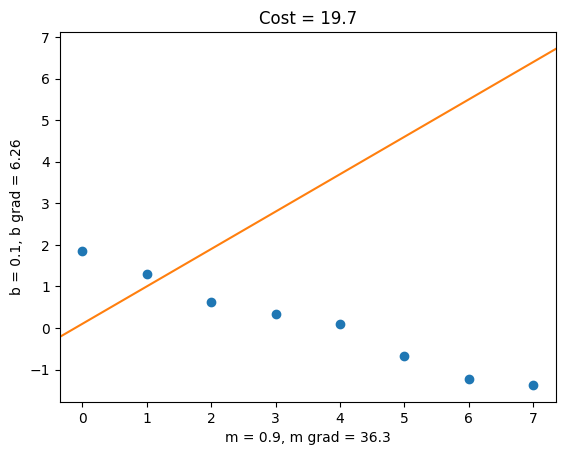

In [106]:
labeled_regression_plot(xs, ys, m, b, C)

**Step 4**: Gradient descent

$\frac{\partial C}{\partial m} = 36.3$ indicates that an increase in $m$ corresponds to a large increase in $C$. 

Meanwhile, $\frac{\partial C}{\partial b} = 6.26$ indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

In the first round of training, the lowest hanging fruit with respect to reducing cost $C$ is therefore to decrease the slope of the regression line, $m$. There will also be a relatively small decrease in the $y$-intercept of the line, $b$. 

In [107]:
optimizer = torch.optim.SGD([m, b], lr=0.01)

In [108]:
optimizer.step()

In [109]:
C = mse(regression(xs,m,b),ys)

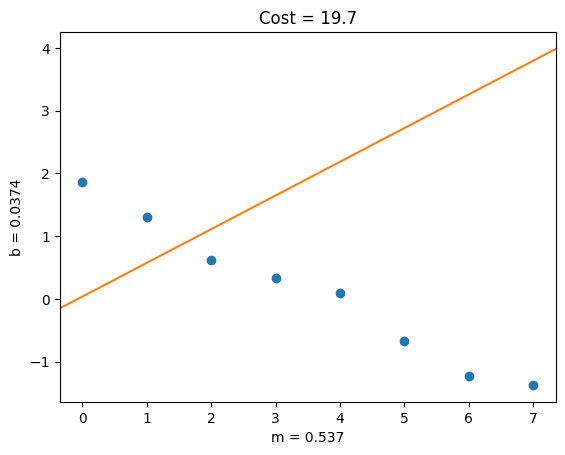

In [110]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False) # Gradient of C hasn't been recalculated

#### Rinse and Repeat

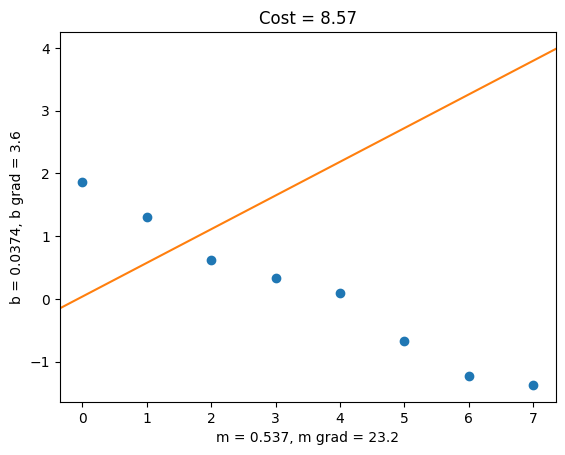

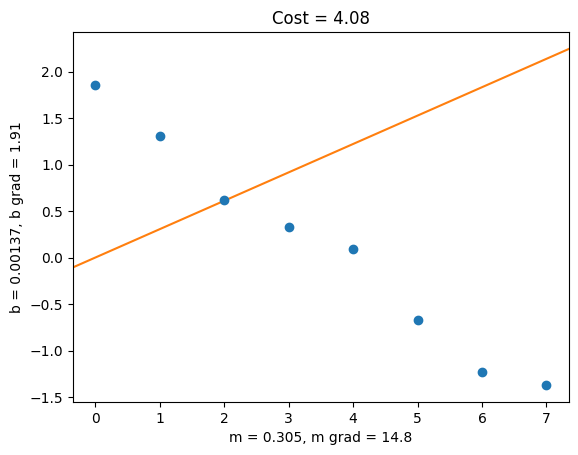

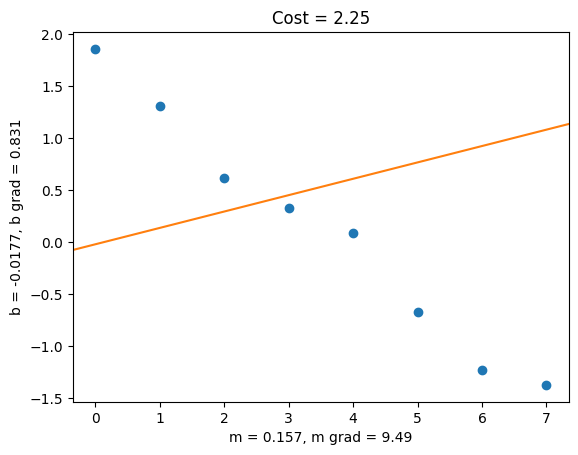

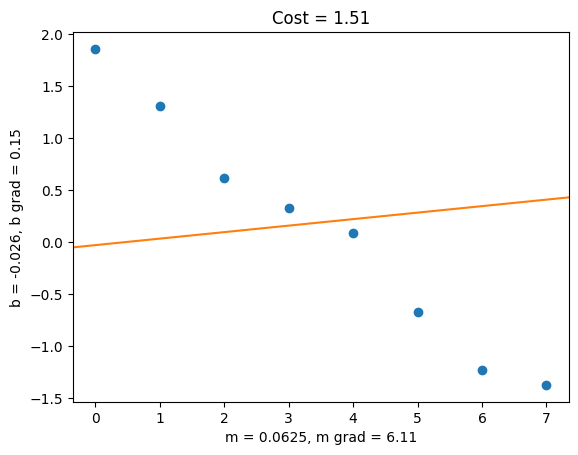

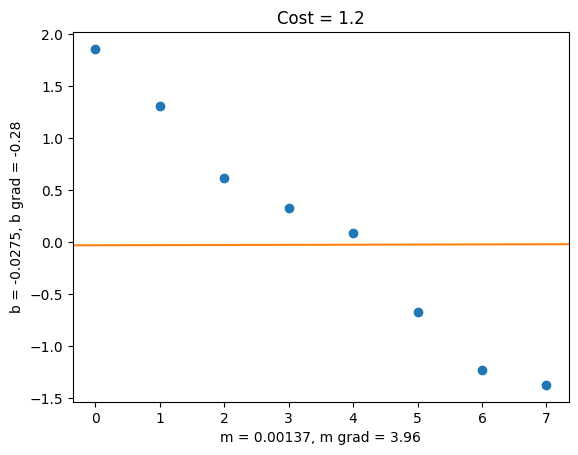

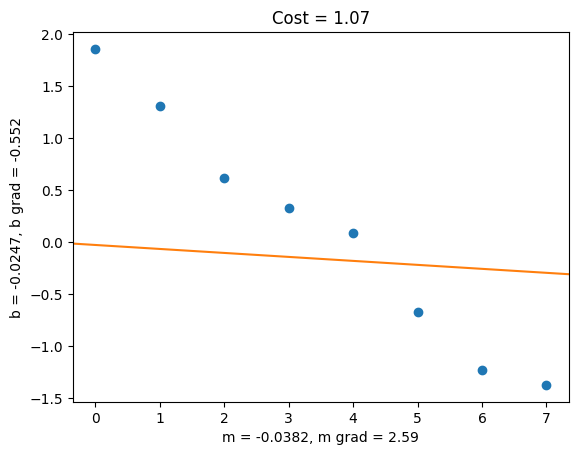

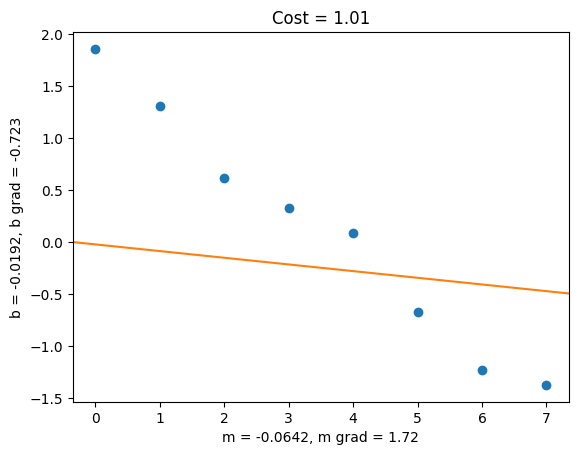

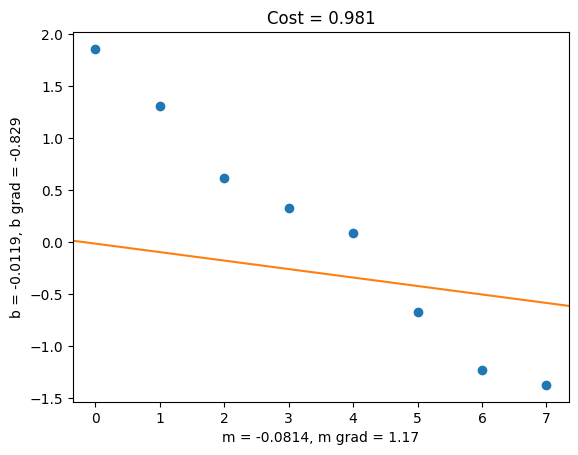

In [111]:
epochs = 8
for epoch in range(epochs): 
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    labeled_regression_plot(xs, ys, m, b, C)
    
    optimizer.step() # Step 4

In later rounds of training, after the model's slope $m$ has become closer to the slope represented by the data, $\frac{\partial C}{\partial b}$ becomes negative, indicating an inverse relationship between $b$ and $C$. Meanwhile, $\frac{\partial C}{\partial m}$ remains positive. 

This combination directs gradient descent to simultaneously adjust the $y$-intercept $b$ upwards and the slope $m$ downwards in order to reduce cost $C$ and, ultimately, fit the regression line snugly to the data. 

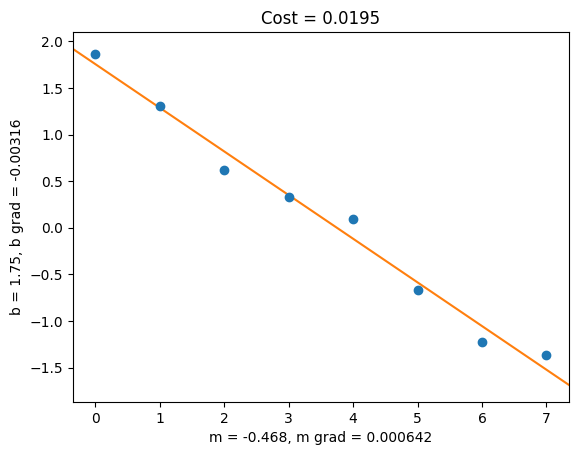

In [113]:
epochs = 1000
for epoch in range(epochs): 
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    optimizer.step() # Step 4

labeled_regression_plot(xs, ys, m, b, C)
